In [59]:
#https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html

In [114]:
import seaborn as sns
import matplotlib as plt
from seaborn import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

In [115]:
stroke_viz = pd.read_csv("Datasets/train_stroke_data_cleaned.csv")


In [116]:
traindf = stroke_viz[['gender', 'age_normalized', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
              'Residence_type','avg_glucose_level_normalized', 'bmi_normalized', 'smoking_status', 'stroke']]

In [117]:
# Generate our categorical variable list
strokesu = traindf.dtypes[traindf.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
traindf[strokesu].nunique()

gender            2
ever_married      2
work_type         4
Residence_type    2
smoking_status    4
dtype: int64

In [118]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
strokeencode_df = pd.DataFrame(enc.fit_transform(traindf[strokesu]))

# Add the encoded variable names to the DataFrame
strokeencode_df.columns = enc.get_feature_names_out(strokesu)
strokeencode_df.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [119]:
# Merge one-hot encoded features and drop the originals
trainerdf = traindf.merge(strokeencode_df,left_index=True, right_index=True)
trainerdf = trainerdf.drop(strokesu,1)
trainerdf.head()

C:\Users\vryne\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,age_normalized,hypertension,heart_disease,avg_glucose_level_normalized,bmi_normalized,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,smoking_status_unknown
0,0.035645,0,0,0.169964,0.091954,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.707031,1,0,0.139631,0.333333,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.096680,0,0,0.236772,0.080460,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.853516,0,0,0.059479,0.287356,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.169922,0,0,0.450244,0.103448,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [120]:
# Remove stroke target from features data
X = trainerdf.drop(columns=["stroke"])
y = trainerdf.stroke

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [121]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.982


In [122]:
importances = rf_model.feature_importances_
importances

array([0.22477852, 0.02190748, 0.02183687, 0.36761788, 0.17910432,
       0.01569854, 0.01559544, 0.00639861, 0.005696  , 0.0117593 ,
       0.00048912, 0.01599325, 0.01516691, 0.01784932, 0.01777911,
       0.01599116, 0.01742818, 0.01492829, 0.01398173])

In [123]:
sorted(zip(importances, trainerdf.columns), reverse=True)


[(0.36761787943823054, 'avg_glucose_level_normalized'),
 (0.2247785200874255, 'age_normalized'),
 (0.17910431894503773, 'bmi_normalized'),
 (0.021907477769299466, 'hypertension'),
 (0.02183686849069257, 'heart_disease'),
 (0.01784931904883031, 'work_type_Self-employed'),
 (0.017779112389394777, 'Residence_type_Rural'),
 (0.017428178208919468, 'smoking_status_formerly smoked'),
 (0.015993245078482477, 'work_type_Never_worked'),
 (0.01599116059633068, 'Residence_type_Urban'),
 (0.015698538534765622, 'stroke'),
 (0.01559543517172358, 'gender_Female'),
 (0.015166905254564194, 'work_type_Private'),
 (0.014928285251477092, 'smoking_status_never smoked'),
 (0.01398172801254052, 'smoking_status_smokes'),
 (0.011759301064796472, 'ever_married_Yes'),
 (0.006398608378145819, 'gender_Male'),
 (0.0056959977161556066, 'ever_married_No'),
 (0.0004891205631875802, 'work_type_Govt_job')]

In [124]:
trainerdf.drop(['smoking_status_unknown'], axis=1, inplace=True)
trainerdf

,age_normalized,hypertension,heart_disease,avg_glucose_level_normalized,bmi_normalized,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.035645,0,0,0.169964,0.091954,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.707031,1,0,0.139631,0.333333,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.096680,0,0,0.236772,0.080460,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.853516,0,0,0.059479,0.287356,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.169922,0,0,0.450244,0.103448,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43384,0.121094,0,0,0.015420,0.114943,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
43385,0.682617,0,0,0.671934,0.517241,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43386,1.000000,1,0,0.156492,0.206897,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
43387,0.487305,0,0,0.187079,0.264368,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [125]:
importance = np.array(importances)
names = np.array(trainerdf.columns)
print(np.count_nonzero(importances))
print(np.count_nonzero(feature_names))
feature_names

19
19


array(['age_normalized', 'hypertension', 'heart_disease',
       'avg_glucose_level_normalized', 'bmi_normalized', 'stroke',
       'gender_Female', 'gender_Male', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'], dtype=object)

In [173]:
def plot_feature_importance(importance,names,model_type):
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure.Figure(figsize=(20,20))

    #plot sns bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.pyplot.title(model_type + ' FEATURE IMPORTANCE')
    plt.pyplot.xlabel('FEATURE IMPORTANCE')
    plt.pyplot.ylabel('FEATURE NAMES')

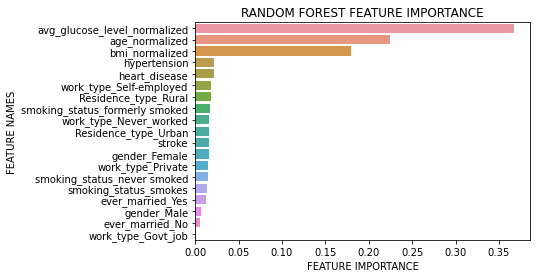

In [175]:
plot_feature_importance(importances,feature_names,'RANDOM FOREST')
